In [323]:
#Getting the lib
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns

In [241]:
#Website
BASE_URL = "http://books.toscrape.com/"
#Using library requests to download index.html (Response=200 is good)
response = requests.get(BASE_URL + "index.html")
#Storing the html code
html = response.content
#Using Beautiful soup to parse the html for pythonformat
soup = BeautifulSoup(html, 'html.parser')

In [242]:
#Creating a list of all pages in on the webside
all_urls=["page-1.html"]

for i in range(49):
    temp_response=requests.get("http://books.toscrape.com/catalogue/" + all_urls[i])
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')
    all_urls.append(temp_soup.find("li","next").a["href"])

for i in range(len(all_urls)):
    all_urls[i]="http://books.toscrape.com/catalogue/"+all_urls[i]

print("generated a list wiht ", len(all_urls), "elements")

generated a list wiht  50 elements


In [243]:
#Finding all titles
book_titles=[]

for url in all_urls:
    temp_response=requests.get(url)
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')

    for book in temp_soup.find_all("img", {"class": "thumbnail"}):
        book_titles.append(book["alt"])

print("Generated a list with ", len(book_titles), "booktitles, first book title is", book_titles[0])

Generated a list with  1000 booktitles, first book title is A Light in the Attic


In [244]:
#Finding all book availability
book_instock=[]

for url in all_urls:
    temp_response=requests.get(url)
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')

    for book in temp_soup.find_all("p", {"class": "instock availability"}):
        book_instock.append(book.text.strip()=="In stock")

print("Generated a list with ", len(book_instock), "availabilities, availability of first book is", book_instock[0])


Generated a list with  1000 availabilities, availability of first book is True


In [245]:
#Finding all prices
book_prices=[]


for url in all_urls:
    temp_response=requests.get(url)
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')

    for book in temp_soup.find_all("p", {"class": "price_color"}):
        book_prices.append(float(book.text.strip("£")))

print("Generated a list with ", len(book_prices), "book prices, first book is", book_prices[0], "£")

Generated a list with  1000 book prices, first book is 51.77 £


In [257]:
#Finding all ratings
book_ratings=[]


for url in all_urls:
    temp_response=requests.get(url)
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')

    for book in temp_soup.find_all("article", {"class": "product_pod"}):
        book_ratings.append(book.p["class"][1])

print("Generated a list with ", len(book_prices), "book ratings, first book has", book_ratings[0], "stars")

Generated a list with  1000 book ratings, first book has Three stars


In [300]:
#Finding all genres
book_genres=[]


for url in all_urls:
    temp_response=requests.get(url)
    temp_html=temp_response.content
    temp_soup = BeautifulSoup(temp_html, 'html.parser')

    for book in temp_soup.find_all("article", {"class": "product_pod"}):
        each_book_link="http://books.toscrape.com/catalogue/"+book.a["href"]
        each_book_response=requests.get(each_book_link)
        each_book_html=each_book_response.content
        each_book_soup = BeautifulSoup(each_book_html, 'html.parser')
        book_genres.append(each_book_soup.find_all("a")[3].string)

print("Generated a list with the genre of ", len(book_genres), "books, first book's genre is", book_genres[0])

Generated a list with the genre of  1000 books, first book's genre is Poetry


In [304]:
#Combining everything into a pandas dataframe
books_df=pd.DataFrame({'title': book_titles,'genre': book_genres, 'price':  book_prices, 'instock':  book_instock, 'rating':  book_ratings})
books_df=books_df.rename_axis("books", axis='rows').rename_axis("info", axis='columns')
books_df=books_df.set_index("title")
books_df

info,genre,price,instock,rating
title,,,,
A Light in the Attic,Poetry,51.77,True,Three
Tipping the Velvet,Historical Fiction,53.74,True,One
Soumission,Fiction,50.10,True,One
Sharp Objects,Mystery,47.82,True,Four
Sapiens: A Brief History of Humankind,History,54.23,True,Five
...,...,...,...,...
Alice in Wonderland (Alice's Adventures in Wonderland #1),Classics,55.53,True,One
"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,57.06,True,Four
A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,True,Five


In [321]:
#Some quick Statistics - which genres have most books and an brief on theirs prices
books_df.groupby("genre").price.agg([len, min, max]).sort_values("len",ascending=False)

,len,min,max
genre,,,
Default,152.0,10.23,58.87
Nonfiction,110.0,11.68,59.90
Sequential Art,75.0,10.16,57.62
Add a comment,67.0,10.02,59.15
Fiction,65.0,10.60,59.98
Young Adult,54.0,10.00,58.14
Fantasy,48.0,12.16,58.75
Romance,35.0,11.10,59.99
Mystery,32.0,10.69,59.48


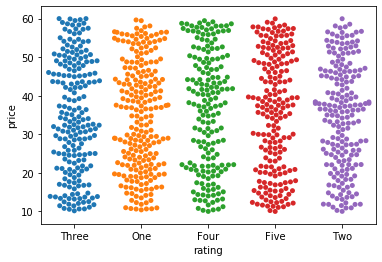

In [327]:
#Quick analysis of price to rating corralation
sns.swarmplot(y=books_df['price'], x=books_df['rating'])

#It is no colleration between Price and Rating - the website www.books.toscrape.com has randomly generated data which discourages further analysis 